# Model Selection and Cross Validation

In [1]:
import numpy as np
import pandas as pd

#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Purchased_Dataset.csv')
x = df[['Age' , 'EstimatedSalary']]
y = df['Purchased']

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.model_selection import train_test_split
# KNeighborsClassifier is used for classification problem. It uses Euclidean distance at the backend.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# random_state is going to help us in choosing model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5)
# Better to choose odd value for "n_neighbors" because if I get two nearest neighbor of same type that time it is very
# difficult for the model to predict on which side it has to go.
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
knnclassifier.fit(x_train, y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.77

In [4]:
x_train.head()

,Age,EstimatedSalary
24,46,23000
33,28,44000
396,51,23000
273,39,106000
246,35,50000


In [5]:
from sklearn.model_selection import train_test_split
# KNeighborsClassifier is used for classification problem. It uses Euclidean distance at the backend.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# random_state is going to help us in choosing model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 3)
# Better to choose odd value for "n_neighbors" because if I get two nearest neighbor of same type that time it is very
# difficult for the model to predict on which side it has to go.
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
knnclassifier.fit(x_train, y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.81

In [6]:
x_train.head()

,Age,EstimatedSalary
75,34,112000
14,18,82000
47,27,54000
46,25,79000
379,58,23000


** So, as we can observe the first row is different for x_train when we change the random state as (5 & 3) resp as shown above. 
This is because it  randomly choose data in the backend with the change in random_state value. It will also result in change of accuracy score.**

## Cross_Validation

Cross_Validation is a technique which involves reserving a partcular sample of data-set on which you do not train the model. 
Later you test the model on this sample before finalizing the model.

Here the steps involves in cross-validation:
    1. You reserve a sample data-set.
    2. Train the model using the remaining part of the data-set.
    3. Use the reserve sample of data set test(validation) set. This will help us to know the effectiveness of model 
       selection. If your model delivers a positive result on validation data, then go ahead with current data. It rocks!

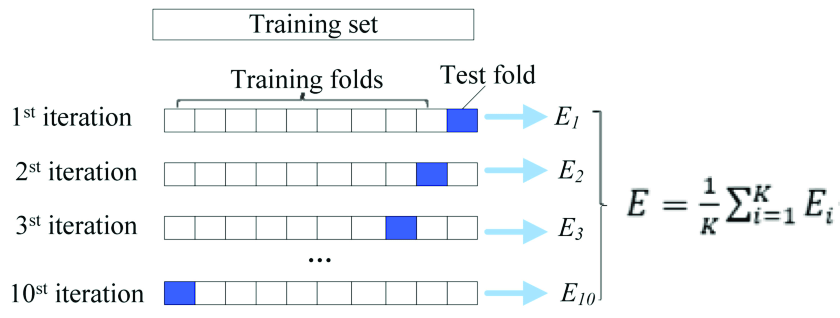

In [7]:
from IPython.display import Image
Image(filename='CV.png')

**This way we are going to get different data-sets which result in better accuracy for the model.**

In [8]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
print(cross_val_score(knnclassifier, x, y, cv = 10, scoring = 'accuracy').mean())

0.777171669793621


In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv = 10, scoring = 'accuracy').mean())

0.6499937460913072


In [10]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
print(cross_val_score(GNB, x, y, cv = 10, scoring = 'accuracy').mean())

0.8775719199499689


**From the above observation, the maximum accuracy is predicted by naive_bayes classifier against logistic and KNeighborsClassifier.**

In [11]:
type(x)

pandas.core.frame.DataFrame

In [12]:
type(y)

pandas.core.series.Series

In [13]:
x.dtypes

Age                int64
EstimatedSalary    int64
dtype: object

In [14]:
y.dtypes

dtype('int64')